# 非线性模拟数据回归

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

[-1.         -0.99227799 -0.98455598 -0.97683398 -0.96911197 -0.96138996
 -0.95366795 -0.94594595 -0.93822394 -0.93050193 -0.92277992 -0.91505792
 -0.90733591 -0.8996139  -0.89189189 -0.88416988 -0.87644788 -0.86872587
 -0.86100386 -0.85328185 -0.84555985 -0.83783784 -0.83011583 -0.82239382
 -0.81467181 -0.80694981 -0.7992278  -0.79150579 -0.78378378 -0.77606178
 -0.76833977 -0.76061776 -0.75289575 -0.74517375 -0.73745174 -0.72972973
 -0.72200772 -0.71428571 -0.70656371 -0.6988417  -0.69111969 -0.68339768
 -0.67567568 -0.66795367 -0.66023166 -0.65250965 -0.64478764 -0.63706564
 -0.62934363 -0.62162162 -0.61389961 -0.60617761 -0.5984556  -0.59073359
 -0.58301158 -0.57528958 -0.56756757 -0.55984556 -0.55212355 -0.54440154
 -0.53667954 -0.52895753 -0.52123552 -0.51351351 -0.50579151 -0.4980695
 -0.49034749 -0.48262548 -0.47490347 -0.46718147 -0.45945946 -0.45173745
 -0.44401544 -0.43629344 -0.42857143 -0.42084942 -0.41312741 -0.40540541
 -0.3976834  -0.38996139 -0.38223938 -0.37451737 -0.

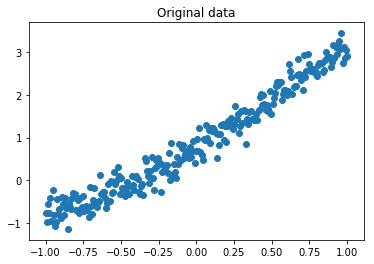

In [2]:
trainsample = 200
testsample = 60

# 这里我们定义模型。这个模型中含有一个简单的输入层和一个隐藏层的sigmoid激活层
def model(X, hidden_weights1, hidden_bias1, ow):
    hidden_layer = tf.nn.sigmoid(tf.matmul(X, hidden_weights1) + b)
    return tf.matmul(hidden_layer, ow)

# 随机生成数据
dsX = np.linspace(-1, 1, trainsample + testsample).transpose()# 在－1到1内返回均匀间隔的数字
dsY = 0.4 * pow(dsX, 2) + 2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8 # 生成Y方向的值

print(dsX)
print(dsY)
plt.figure()# 创建输出文件
plt.title("Original data")
plt.scatter(dsX, dsY)# 绘制数据点的三点图

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 创建第一个隐藏层
hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.01))
#创建输出链接
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.01))
# 产生误差
b = tf.Variable(tf.random_normal([10], stddev=0.01))

model_y = model(X, hw1, b, ow)

# 损失函数
cost = tf.pow(model_y - Y, 2) / (2)

# 创建优化器
train_op = tf.train.AdamOptimizer(0.0001).minimize(cost)

In [6]:
# 在进程中启动
with tf.Session() as sess:
    tf.global_variables_initializer().run()#初始化所以变量
    
    for i in range(1, 10):
        trainX, trainY = dsX[0:trainsample], dsY[0:trainsample]#对样本进行堆积抽样保证有较好的训练效果
        for x1, y1 in zip(trainX, trainY):
            sess.run(train_op, feed_dict={X:[[x1]], Y:y1})
        testX, testY = dsX[trainsample:trainsample + testsample], dsY[0:trainsample:trainsample + testsample]
        cost1 = 0.
        for x1, y1 in zip(testX, testY):
            cost1 += sess.run(cost, feed_dict={X:[[x1]], Y:y1}) / testsample
            print("Average cost for ecpch " + str(i) + ":" + str(cost1))
        dsX, dsY = shuffle(dsX, dsY)#我们随机抽样来实施更好的训练

Average cost for ecpch 1:[[0.00552703]]
Average cost for ecpch 2:[[0.00017944]]


Average cost for ecpch 3:[[0.01110269]]
Average cost for ecpch 4:[[0.00018792]]


Average cost for ecpch 5:[[0.00028509]]
Average cost for ecpch 6:[[0.05900216]]


Average cost for ecpch 7:[[0.04499966]]
Average cost for ecpch 8:[[0.00687639]]


Average cost for ecpch 9:[[0.00097307]]
